In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

In [3]:
%matplotlib inline

tf.__version__

'2.3.1'

In [4]:
## setting the classes name in the datasets

class_names =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
# loading the datasets

(X_train ,y_train),(X_test,y_test) =cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
## normalizing the data

X_train =X_train/255.0

X_test =X_test/255.0

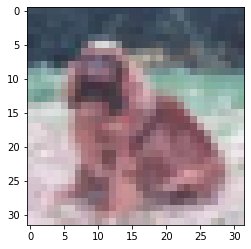

In [7]:
plt.imshow(X_test[101])

## Will use CNN model over here

In [33]:
### model defination 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [34]:
## compiling the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5935 - accuracy: 0.4163
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1797 - accuracy: 0.5820
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0179 - accuracy: 0.6436
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9099 - accuracy: 0.6826
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8189 - accuracy: 0.7145
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7563 - accuracy: 0.7375
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6950 - accuracy: 0.7562
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6449 - accuracy: 0.7744
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6048 - accuracy: 0.7849
Epoch 10/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.565

In [36]:
test_loss , test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8551 - accuracy: 0.7562


In [32]:
test_accuracy

0.7465999722480774